In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [11]:
df_US = df[df['job_country'] == 'United States'].copy()

job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Senior Data Scientist','Senior Data Analyst', 'Senior Data Engineer']

df_US_5 = df_US[df_US['job_title_short'].isin(job_titles)]

df_US_5_order = df_US_5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

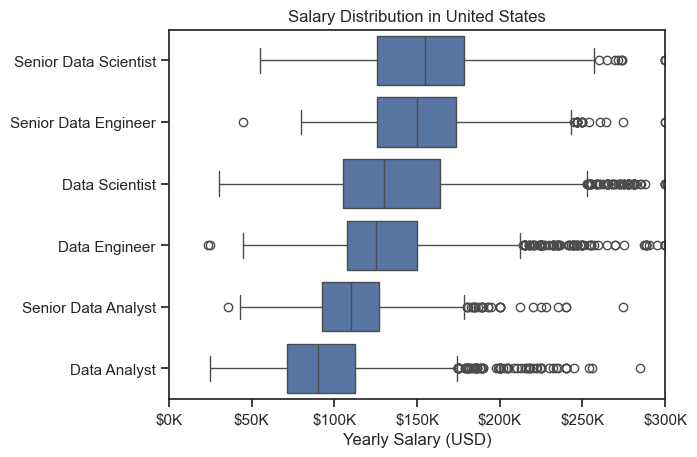

In [12]:
sns.boxplot(df_US_5,x='salary_year_avg',y='job_title_short', order=df_US_5_order)
sns.set_theme(style='ticks')

ax = plt.gca().xaxis
ax2 = plt.gca().yaxis
ax2.set_label_text('')
ax.set_label_text('Yearly Salary (USD)')
ax.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.title('Salary Distribution in United States')
plt.show()

In [13]:
df_US = df_US[df_US['job_title_short'] == 'Data Analyst']
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US_exploded = df_US.explode('job_skills')  

df_US_top_payed = df_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_US_popular = df_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

In [14]:
df_US_popular

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


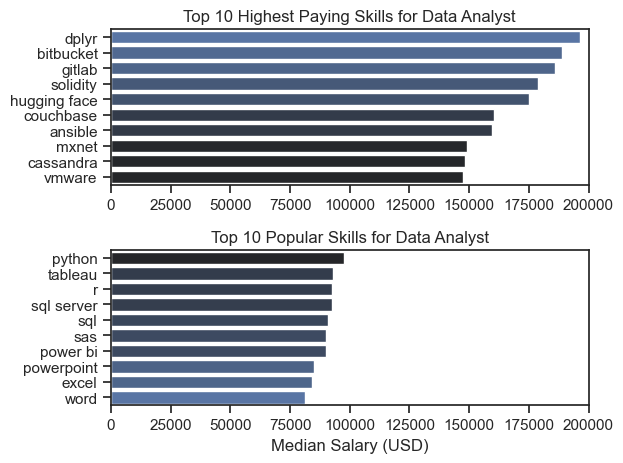

In [15]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_US_top_payed, x='median', y=df_US_top_payed.index, ax=ax[0], hue='median', palette='dark:b')
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].set_xlim(0,200000)


sns.barplot(df_US_popular, x='median', y=df_US_popular.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].set_title('Top 10 Popular Skills for Data Analyst')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

fig.tight_layout()
plt.show()